# Multivariate Regression - Boston Housing Prices

## Linear Regression on Boston Dataset(Multivariate Case using SkLearn)

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
boston = load_boston()

In [30]:
X = boston.data
Y = boston.target

print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [34]:
data = pd.DataFrame(boston.data)
print(data)

           0     1      2    3      4      5      6       7     8      9   \
0     0.00632  18.0   2.31  0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07  0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07  0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18  0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18  0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18  0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87  0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87  0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87  0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87  0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87  0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87  0.0  0.524  6.009   82.9  6.2267   5.0  311.0   

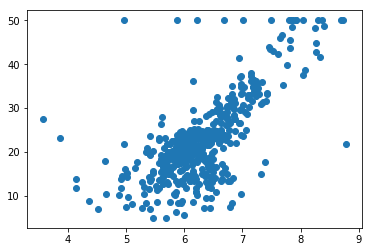

In [33]:
plt.scatter(X[:,5],Y)
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


## Train our Linear Regression Model

In [6]:
 # 1. Create an object
lr = LinearRegression(normalize = True)

# 2. Training
lr.fit(X_train,Y_train)
    
# OutPut 

print(lr.coef_)
print(lr.intercept_)

[-8.32756295e-02  4.62697489e-02 -1.48506182e-02  1.29619897e+00
 -1.56061644e+01  3.71308083e+00 -2.21434721e-02 -1.79730792e+00
  3.22695626e-01 -1.31917487e-02 -9.67590587e-01  9.83292300e-03
 -5.35979977e-01]
39.475723320014374


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


## Accuracy of Regression

In [7]:
print("Traing Score %.4f"%lr.score(X_train,Y_train))
print("Test Scor %.4f"%lr.score(X_test,Y_test))


Traing Score 0.7366
Test Scor 0.7303


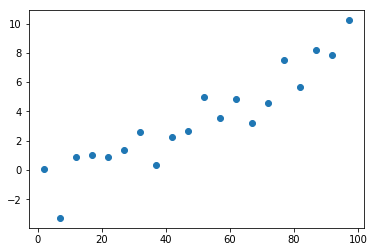

In [8]:
X = np.arange(2,100,5)

noise = np.random.randn(20)
Y = 0.001*X**2 +noise

plt.scatter(X,Y)

plt.show()

In [9]:
x1 = X
x2 = X**2

X = np.stack((x1,x2),axis = 1)


print(X.shape)
print(Y.shape)

(20, 2)
(20,)


In [10]:
model = LinearRegression()

## Training

In [11]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predictions

In [12]:
# predict is a func in sklearn library, that pridicts all the theata for us.
output = model.predict(X)

In [13]:
# Parameters Learned, intercept_ => Q0  and  coef_ =>  are the all the no. of feature present in the dataset

bias = model.intercept_
coeff = model.coef_

print(bias)
print(coeff)

-0.7703386506371279
[0.05015725 0.00053538]


## Score

In [14]:
# score func is used to tell that how good our algorithm is in pridiction.

model.score(X,Y)

0.8716021509350897

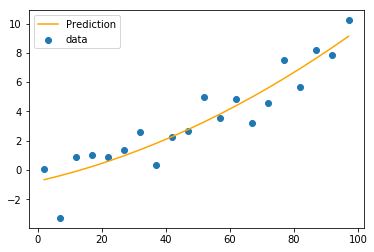

In [15]:
## Visualise

plt.scatter(X[:,0],Y,label ='data')
plt.plot(X[:,0],output,color='orange',label = 'Prediction')
plt.legend()
plt.show()

# Gradient Descent Variant - Stochastic Vs mini Batch

# K-Fold Cross Validation

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
scores = cross_val_score(lr,X_train,Y_train,cv = 10, scoring='r2')

In [18]:
print(scores)

[0.67426168 0.74994247 0.79358128 0.76389372 0.77111789 0.78307873
 0.60726311 0.42985214 0.6160001  0.76194698]


In [19]:
print(scores.mean())

0.695093809023324


In [20]:
print(scores.std())

0.1096307917943147
